In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adamax

import numpy as np

from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

---

# Carregando dados

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---

# Análise das colunas

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df_juntado = pd.concat([df_train, df_test])

In [8]:
df_juntado.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_juntado.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df = pd.DataFrame()

In [11]:
def gera_graf(dado, coluna, contador=True):
    print(f'Valores unicos: {dado[coluna].nunique()}')
    print(f'Quais são os valores unicos: {dado[coluna].unique()}')
    print(f'Quantidade de valores nulls: {dado[coluna].isnull().sum()}')
    print(f'Qtde por opcao: \n{dado[coluna].value_counts()}')
    
    if contador:
        # Gráfico de contagem
        plt.figure(figsize=(8, 6))
        dado.groupby([coluna, 'Survived']).size().unstack().plot(kind='bar')
        plt.xlabel(f'Coluna: {coluna}')
        plt.ylabel('Quantidade de pessoas')
        plt.xticks(rotation=0)
        plt.title(coluna)
        plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
        plt.show()

In [12]:
df["Survived"] = df_juntado["Survived"]

---

## Pclass

Valores unicos: 3
Quais são os valores unicos: [3 1 2]
Quantidade de valores nulls: 0
Qtde por opcao: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

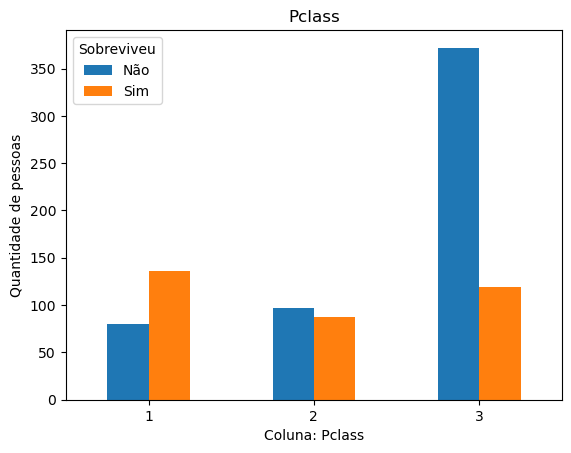

In [13]:
gera_graf(df_juntado, "Pclass")

In [14]:
df["Pclass"] = df_juntado["Pclass"]

---

## Name

Valores unicos: 1307
Quais são os valores unicos: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
Quantidade de valores nulls: 0
Qtde por opcao: 
Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: count, Length: 1307, dtype: int64


<Figure size 800x600 with 0 Axes>

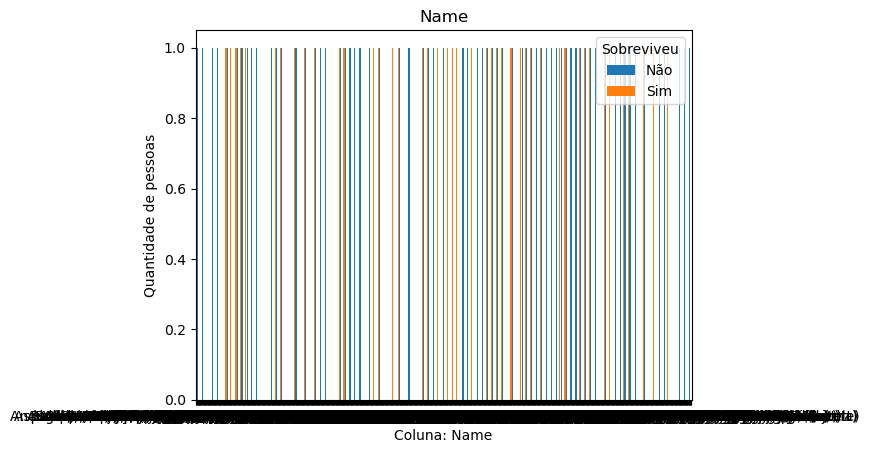

In [15]:
gera_graf(df_juntado,"Name")

---

## Sex

Valores unicos: 2
Quais são os valores unicos: ['male' 'female']
Quantidade de valores nulls: 0
Qtde por opcao: 
Sex
male      843
female    466
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

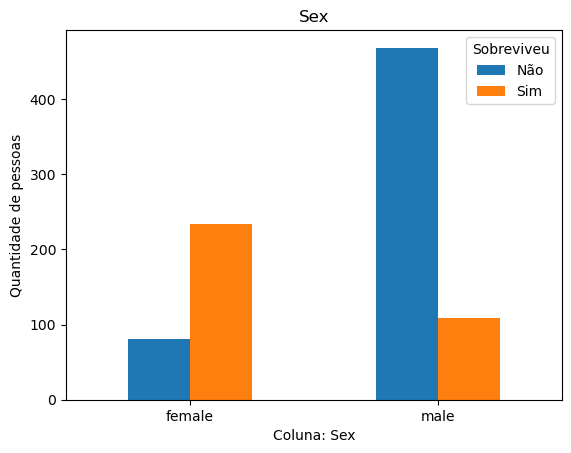

In [16]:
gera_graf(df_juntado,'Sex')

In [17]:
df["Sex"] = df_juntado["Sex"]

---

## Age

Valores unicos: 98
Quais são os valores unicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
Quantidade de valores nulls: 263
Qtde por opcao: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


<Figure size 800x600 with 0 Axes>

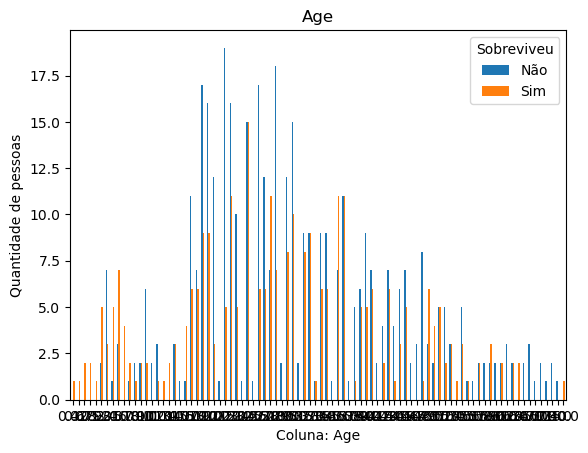

In [18]:
gera_graf(df_juntado,"Age")

In [19]:
df["Age"] = df_juntado["Age"]

---

## SibSp

Valores unicos: 7
Quais são os valores unicos: [1 0 3 4 2 5 8]
Quantidade de valores nulls: 0
Qtde por opcao: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

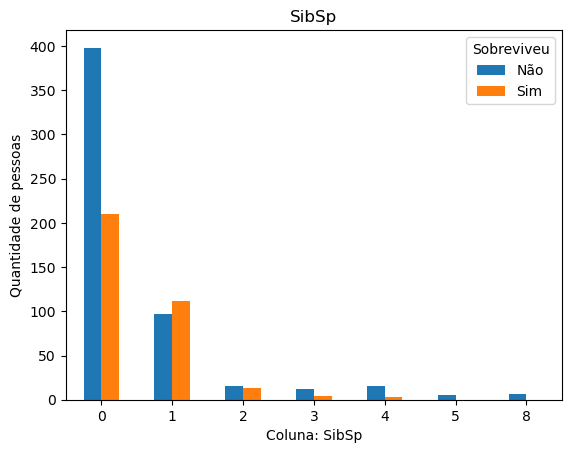

In [20]:
gera_graf(df_juntado, "SibSp")

In [21]:
df["SibSp"] = df_juntado["SibSp"]

---

## Parch

Valores unicos: 8
Quais são os valores unicos: [0 1 2 5 3 4 6 9]
Quantidade de valores nulls: 0
Qtde por opcao: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

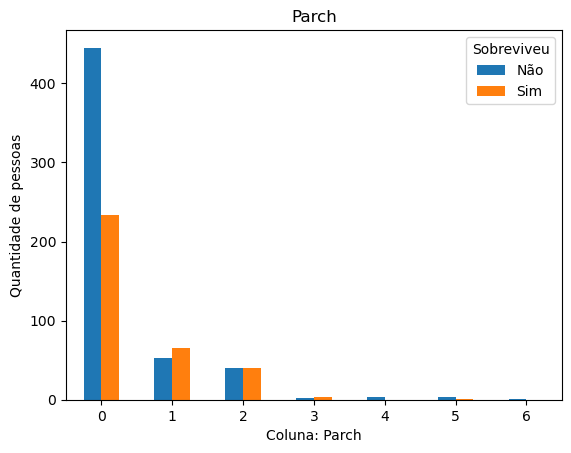

In [22]:
gera_graf(df_juntado, "Parch")

In [23]:
df["Parch"] = df_juntado["Parch"]

---

## Ticket

Valores unicos: 929
Quais são os valores unicos: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 1775

<Figure size 800x600 with 0 Axes>

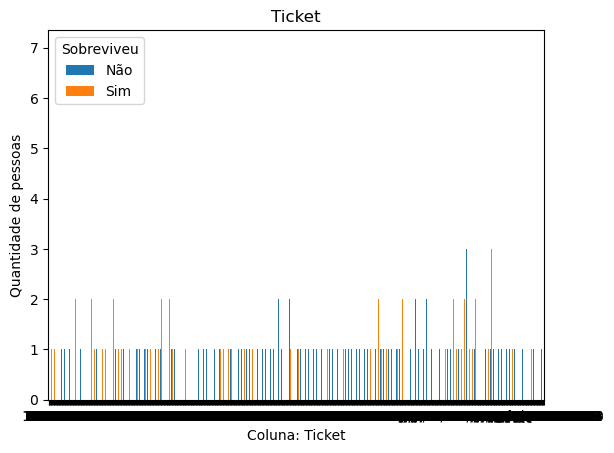

In [24]:
gera_graf(df_juntado, "Ticket")

---

## Fare

Valores unicos: 281
Quais são os valores unicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.    

<Figure size 800x600 with 0 Axes>

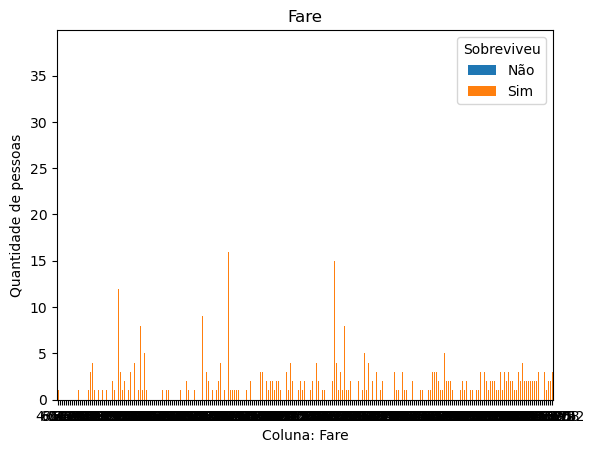

In [25]:
gera_graf(df_juntado, "Fare")

In [26]:
df["Fare"] = df_juntado["Fare"]

---

## Cabin

Valores unicos: 186
Quais são os valores unicos: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C

<Figure size 800x600 with 0 Axes>

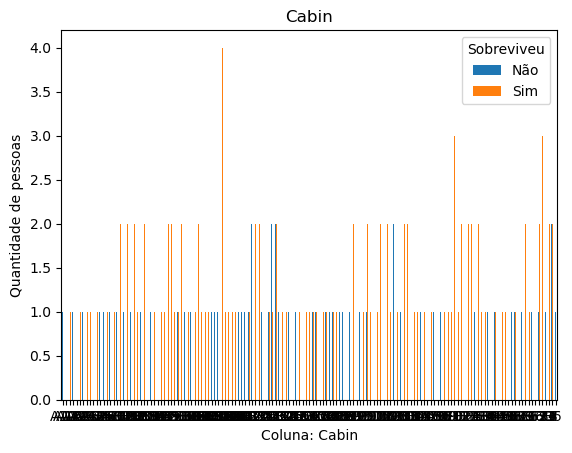

In [27]:
gera_graf(df_juntado, "Cabin")

---

## Embarked

Valores unicos: 3
Quais são os valores unicos: ['S' 'C' 'Q' nan]
Quantidade de valores nulls: 2
Qtde por opcao: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

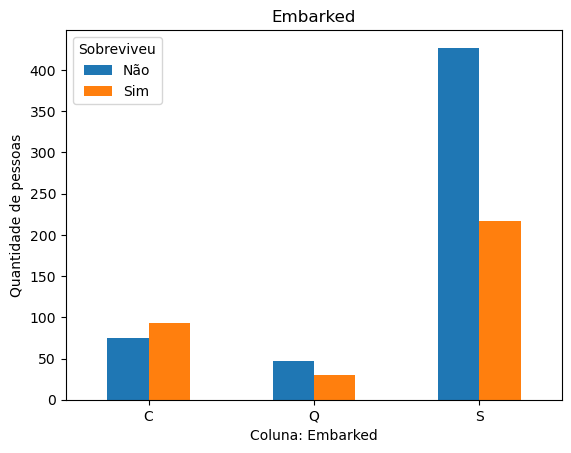

In [28]:
gera_graf(df_juntado, "Embarked")

In [29]:
df["Embarked"] = df_juntado["Embarked"]

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


---

## Fazendo pré-processamento do dataframe final

In [31]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

##### Preenchendo os nulls das idades com a media

In [32]:
df["Age"].mean()

29.881137667304014

In [33]:
df["Age"] = df["Age"].fillna(29)

##### Mapeando o sexo para 1 e 0

In [34]:
df["Sex"] = df['Sex'].map({'male': 1, 'female': 0})

##### Fazendo dummies do portao de embarque e da classe

In [35]:
df = pd.get_dummies(df, columns=["Embarked"])

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,22.0,1,0,7.2500,False,False,True
1,1.0,1,0,38.0,1,0,71.2833,True,False,False
2,1.0,3,0,26.0,0,0,7.9250,False,False,True
3,1.0,1,0,35.0,1,0,53.1000,False,False,True
4,0.0,3,1,35.0,0,0,8.0500,False,False,True


In [37]:
df = pd.get_dummies(df, columns=["Pclass"])

In [38]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,7.2500,False,False,True,False,False,True
1,1.0,0,38.0,1,0,71.2833,True,False,False,True,False,False
2,1.0,0,26.0,0,0,7.9250,False,False,True,False,False,True
3,1.0,0,35.0,1,0,53.1000,False,False,True,True,False,False
4,0.0,1,35.0,0,0,8.0500,False,False,True,False,False,True


In [39]:
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df['Pclass_1'] = df['Pclass_1'].astype(int)
df['Pclass_2'] = df['Pclass_2'].astype(int)
df['Pclass_3'] = df['Pclass_3'].astype(int)

In [40]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1.0,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1.0,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1.0,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0.0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [41]:
X_train = np.random.random((1000, 10))
y_train = np.random.randint(2, size=(1000, 1))

In [42]:
def modelo_treinamento(optimizer_name, epocas, X_train, y_train):

    # Usando Keras para construir e treinar uma rede neural com otimizador especificado
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer_name == "SGD":
        optimizer = SGD(learning_rate=0.01, momentum=0.9)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        # Convertendo rótulos para array (necessário para treinamento no Keras)
        y_train_keras = np.squeeze(y_train)

        # Treinando a rede neural no mesmo conjunto de dados
        model.fit(X_train, y_train_keras, epochs = epocas, batch_size=32)

        # Fazendo previsões com a rede neural
        nn_predictions_prob = model.predict(X_train)

        # Convertendo as probabilidades para classes com um limiar de 0.5
        nn_predictions_classes = (nn_predictions_prob > 0.5).astype(int)

        # Avaliando a acurácia da rede neural
        nn_accuracy = accuracy_score(y_train_keras, nn_predictions_classes)
        print("Acurácia:", nn_accuracy)

        return nn_accuracy
        
    
    else:
        model.compile(optimizer=optimizer_name, loss='binary_crossentropy', metrics=['accuracy'])

        # Convertendo rótulos para array (necessário para treinamento no Keras)
        y_train_keras = np.squeeze(y_train)

        # Treinando a rede neural no mesmo conjunto de dados
        model.fit(X_train, y_train_keras, epochs = epocas, batch_size=32)

        # Fazendo previsões com a rede neural
        nn_predictions_prob = model.predict(X_train)

        # Convertendo as probabilidades para classes com um limiar de 0.5
        nn_predictions_classes = (nn_predictions_prob > 0.5).astype(int)

        # Avaliando a acurácia da rede neural
        nn_accuracy = accuracy_score(y_train_keras, nn_predictions_classes)
        print("Acurácia:", nn_accuracy)

        return nn_accuracy

In [4]:
def plot_acuracias(acuracias, otimizadores):
    sns.set(style="whitegrid")

    data = {"Otimizador": otimizadores, "Acuracia": acuracias}
    df = pd.DataFrame(data)

    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x="Otimizador", y="Acuracia", data=df, palette="viridis")

    plt.title("Acurácia por Otimizador")
    plt.xlabel("Otimizador")
    plt.ylabel("Acurácia")

    plt.show()


In [44]:
acuracias_100 = []
acuracias_500 = []
acuracias_1000 = []

otimizadores = ['AdaMax', 'Adam']

---

## Acurácias de 100 épocas

In [45]:
acuracia = modelo_treinamento('Adamax', 100 , X_train, y_train)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5190
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5400
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5430
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5410
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5420
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5470
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5540
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5520
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.6070
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.6000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6030
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5960
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6070
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6160
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6120
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.6030
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6050
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6160
Epoch 93/100


In [46]:
acuracias_100.append(acuracia)

In [47]:
acuracia = modelo_treinamento('Adam', 100 , X_train, y_train)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5180
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5240
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5370
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5470
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5400
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5400
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5490
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5450
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.7120
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7160
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7090
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7240
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7270
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7150
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7250
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7190
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.7210
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7250
Epoch 93/100


In [48]:
acuracias_100.append(acuracia)

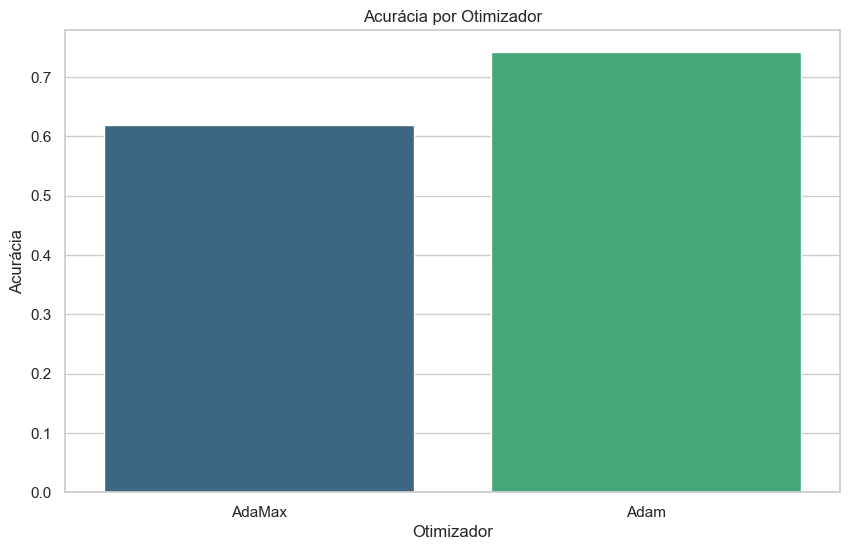

In [49]:
plot_acuracias(acuracias_100, otimizadores)

In [50]:
print(acuracias_100)

[0.62, 0.742]


---

## Acurácias em 500 épocas

In [51]:
acuracia = modelo_treinamento('Adamax', 500, X_train, y_train)

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.5050
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5160
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5180
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5350
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5350
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5500
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5630
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5520
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5650
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5590
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6160
Epoch 84/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.6210
Epoch 85/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6170
Epoch 86/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6160
Epoch 87/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6200
Epoch 88/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6190
Epoch 89/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.6220
Epoch 90/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6200
Epoch 91/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6220
Epoch 92/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6310
Epoch 93/500


32/32 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6990
Epoch 246/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7020
Epoch 247/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.6980
Epoch 248/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7000
Epoch 249/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7050
Epoch 250/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7040
Epoch 251/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7060
Epoch 252/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.7040
Epoch 253/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7060
Epoch 254/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7040
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7630
Epoch 408/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7640
Epoch 409/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7680
Epoch 410/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7730
Epoch 411/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7600
Epoch 412/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7620
Epoch 413/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.7670
Epoch 414/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7610
Epoch 415/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7650
Epoch 416/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7680
Epoc

In [52]:
acuracias_500.append(acuracia)

In [53]:
acuracia = modelo_treinamento('Adam', 500, X_train, y_train)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4970
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5270
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5460
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5350
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5420
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5420
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5490
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5580
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5570
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5620
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7010
Epoch 84/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7010
Epoch 85/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7030
Epoch 86/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7010
Epoch 87/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7140
Epoch 88/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7020
Epoch 89/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.7030
Epoch 90/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5661 - accuracy: 0.7120
Epoch 91/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7110
Epoch 92/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7210
Epoch 93/500


32/32 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8300
Epoch 246/500
32/32 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8520
Epoch 247/500
32/32 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8360
Epoch 248/500
32/32 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8320
Epoch 249/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8290
Epoch 250/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8510
Epoch 251/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8390
Epoch 252/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8540
Epoch 253/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8400
Epoch 254/500
32/32 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8490
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9180
Epoch 408/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9290
Epoch 409/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9320
Epoch 410/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9320
Epoch 411/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9330
Epoch 412/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9200
Epoch 413/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9280
Epoch 414/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9330
Epoch 415/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9320
Epoch 416/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9340
Epoc

In [54]:
acuracias_500.append(acuracia)

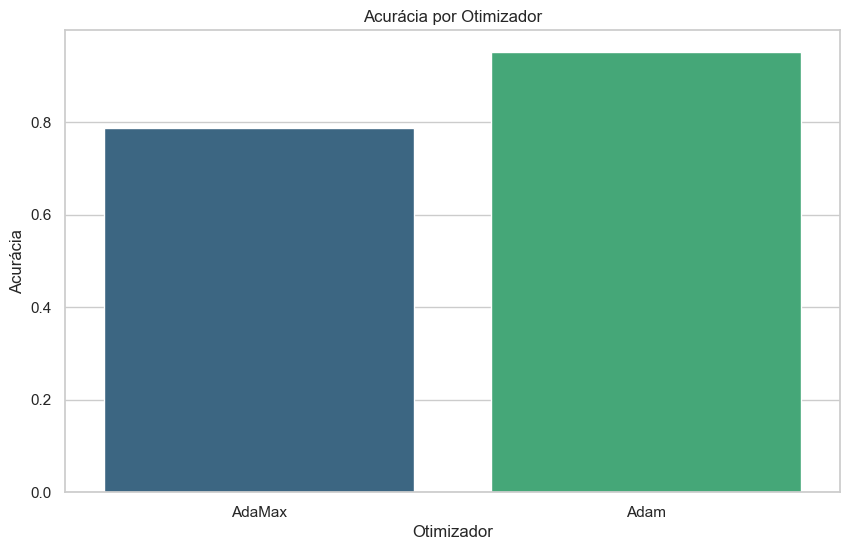

In [55]:
plot_acuracias(acuracias_500, otimizadores)

In [56]:
print(acuracias_500)

[0.788, 0.951]


---

## Acurácias em 1000 épocas

In [57]:
acuracia = modelo_treinamento('Adamax', 1000, X_train, y_train)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.4980
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5160
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5220
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5070
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5370
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5390
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5400
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5500
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5540
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5470

32/32 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.6660
Epoch 163/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.6630
Epoch 164/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.6640
Epoch 165/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6730
Epoch 166/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.6650
Epoch 167/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.6630
Epoch 168/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.6630
Epoch 169/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6680
Epoch 170/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6620
Epoch 171/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.7150
Epoch 323/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.7080
Epoch 324/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7180
Epoch 325/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7170
Epoch 326/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.7220
Epoch 327/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7120
Epoch 328/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7250
Epoch 329/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7150
Epoch 330/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7160
Epoch 331/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7730
Epoch 483/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7700
Epoch 484/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7720
Epoch 485/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7780
Epoch 486/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7620
Epoch 487/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7650
Epoch 488/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7740
Epoch 489/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7690
Epoch 490/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7680
Epoch 491/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8140
Epoch 643/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8030
Epoch 644/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8170
Epoch 645/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8160
Epoch 646/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8120
Epoch 647/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8070
Epoch 648/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8190
Epoch 649/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8160
Epoch 650/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8120
Epoch 651/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.3858 - accuracy: 0.8520
Epoch 803/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8430
Epoch 804/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8520
Epoch 805/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8480
Epoch 806/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8510
Epoch 807/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8500
Epoch 808/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8460
Epoch 809/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8490
Epoch 810/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8500
Epoch 811/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8740
Epoch 963/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8810
Epoch 964/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8720
Epoch 965/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8810
Epoch 966/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8820
Epoch 967/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8770
Epoch 968/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8830
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8810
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8780
Epoch 971/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.

In [58]:
acuracias_1000.append(acuracia)

In [59]:
acuracia = modelo_treinamento('Adam', 1000, X_train, y_train)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.5190
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5280
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5300
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5330
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5570
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5540
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5510
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5440
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5610
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5770

32/32 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8470
Epoch 163/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8460
Epoch 164/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8400
Epoch 165/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8430
Epoch 166/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8440
Epoch 167/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8430
Epoch 168/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8380
Epoch 169/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8440
Epoch 170/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8520
Epoch 171/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9460
Epoch 323/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9430
Epoch 324/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9450
Epoch 325/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9420
Epoch 326/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9510
Epoch 327/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9490
Epoch 328/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9450
Epoch 329/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9460
Epoch 330/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9450
Epoch 331/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9960
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9940
Epoch 484/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9980
Epoch 485/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9950
Epoch 486/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9940
Epoch 487/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9920
Epoch 488/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9950
Epoch 489/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9960
Epoch 490/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9980
Epoch 491/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 1.0000
Epoch 643/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 644/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 645/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 646/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 1.0000
Epoch 647/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 648/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 649/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 650/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 651/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 1.

32/32 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 803/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 804/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 805/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 806/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 807/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 808/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 809/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 810/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 811/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 1.

32/32 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 963/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 964/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 965/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 966/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 967/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 968/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 971/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.

In [60]:
acuracias_1000.append(acuracia)

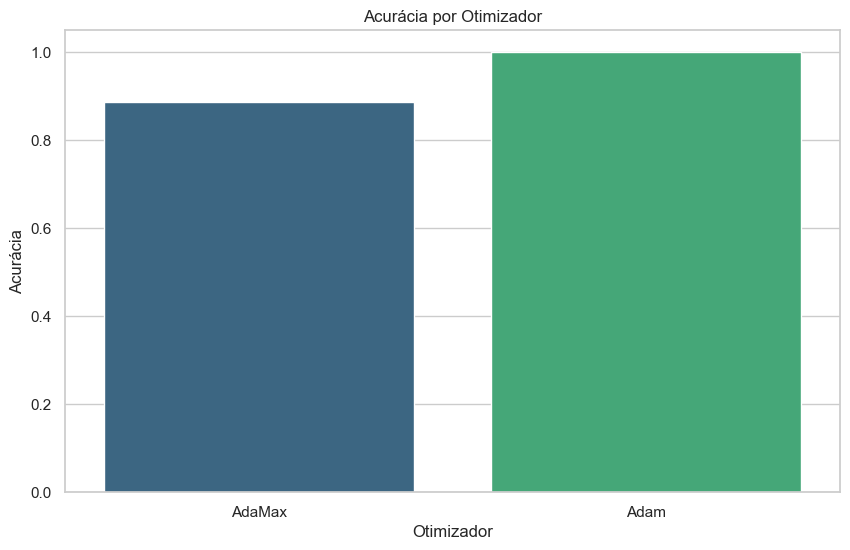

In [61]:
plot_acuracias(acuracias_1000, otimizadores)

In [62]:
print(acuracias_1000)

[0.886, 1.0]


In [2]:
acc_final = [0.62, 0.742, 0.788, 0.951, 0.886, 1.0]
acc_finall_adamax = [0.62, 0.788, 0.886]
acc_final_adam = [0.742, 0.951, 1]
otimizadores = ['AdaMax', 'Adam']

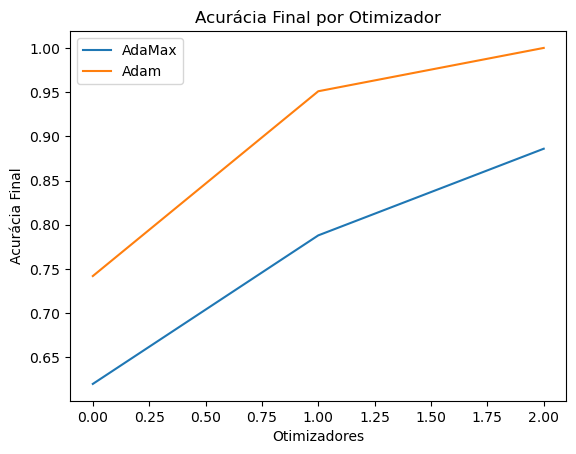

In [7]:
# Criar um gráfico de linha
plt.plot(acc_finall_adamax, label='AdaMax')
plt.plot(acc_final_adam, label='Adam')

# Adicionar rótulos ao gráfico
plt.xlabel('Otimizadores')
plt.ylabel('Acurácia Final')
plt.title('Acurácia Final por Otimizador')
plt.legend()  # Adicionar a legenda